In [162]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 1. Understand the dataset

## 1.1 Import the dataset

In [163]:
service_req_df = pd.read_csv('311-service-requests-nyc.zip')

## 1.2 Visualize the dataset


    * The Dataset contain 53 columns , It can be divided into 
    1) Date Variables , 
    2)Location Variables,
    3)Complaint Type Variables  
    
* The date variables contain Created Date ,Closed Date, Due Date and  Resolution Action Updated Date
* In Location variable Location Type,Street Name,City are the Valid variables for getting a overall view of the data 
* In Complaint type Complaint Type,Resolution Description are the main Variables with which we can make general conclusions 

In [164]:
# For Quick Evaluation purpose we are selecting some of the variables 

date_cols=['Created Date','Closed Date','Due Date','Resolution Action Updated Date']
loc_cols=['Location Type','Street Name','City']
comp_cols=['Complaint Type','Resolution Description']

In [165]:
# Changing all the Date variables to datetime Objects
service_req_df[date_cols]=service_req_df[date_cols].apply(pd.to_datetime)

In [166]:
# Understanding the Timeline of the Dataset 
End_Date   =service_req_df['Created Date'].max()
Start_Date =service_req_df['Created Date'].min()
Total_Dur =End_Date-Start_Date

Total_Dur# the data set contain about one year data for the NYPD Department complaints for different cities 

Timedelta('364 days 23:58:55')

In [167]:
service_req_df['City'].nunique()
# there are about 53 cities in the dataset 

53

In [168]:
service_req_df['Complaint Type'].nunique()
# There are 24 different complaint types in the dataset 

24

### Visualization
### All the variables are Catagorical Variables , only the Date  columns can be considered as Continous Variable 

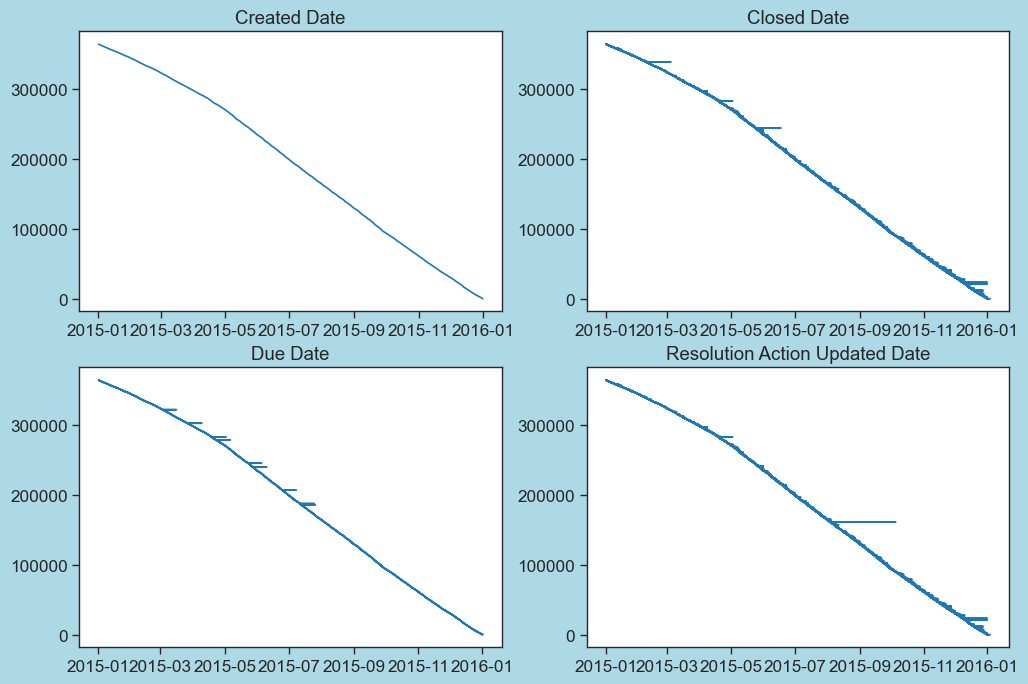

In [169]:
df =service_req_df[date_cols]
fig,ax =plt.subplots(2,2 ,figsize=(12,8),facecolor='lightblue')
ax[0,0].plot(df['Created Date'].values,df['Created Date'].index)
ax[0,1].plot(df['Closed Date'].values,df['Closed Date'].index)
ax[1,0].plot(df['Due Date'].values,df['Due Date'].index)
ax[1,1].plot(df['Resolution Action Updated Date'].values,df['Resolution Action Updated Date'].index)
ax[0,0].set_title('Created Date')
ax[0,1].set_title('Closed Date')
ax[1,0].set_title('Due Date')
ax[1,1].set_title('Resolution Action Updated Date');

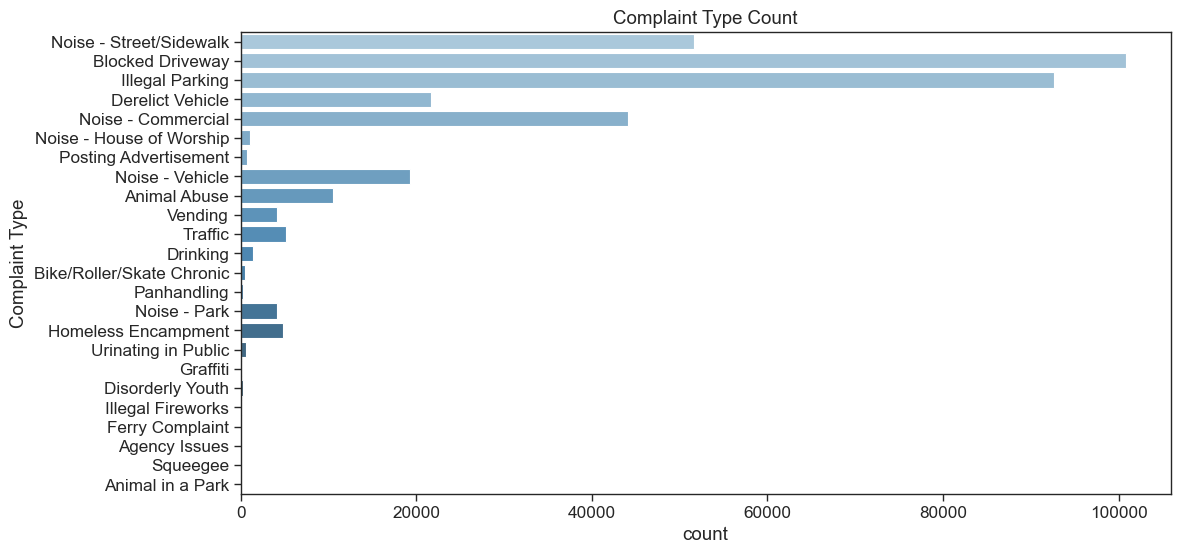

In [170]:
plt.figure(figsize=(12,6))
fig= sns.countplot(data=service_req_df,y='Complaint Type',palette='Blues_d')
fig.set_title('Complaint Type Count');

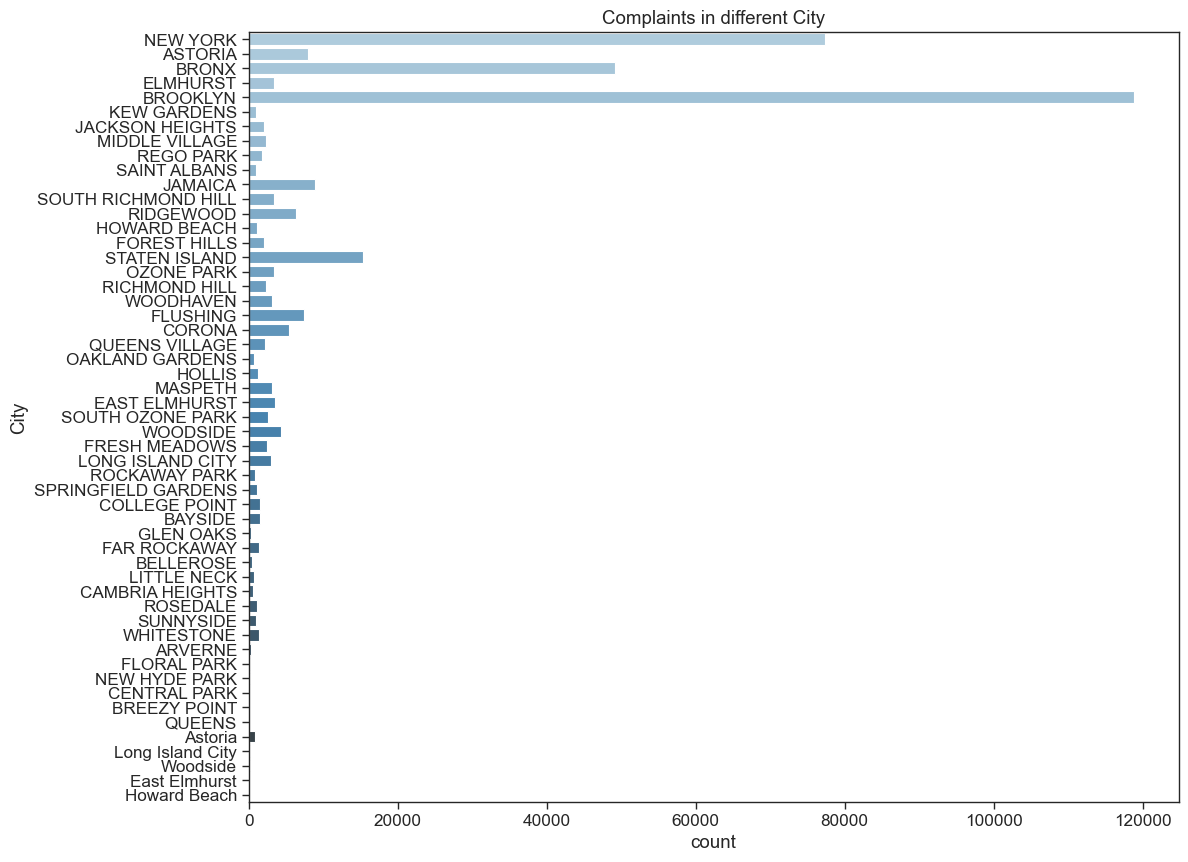

In [171]:
plt.figure(figsize=(12,10))
fig = sns.countplot(data=service_req_df,y='City',palette='Blues_d')
fig.set_title('Complaints in different City');

#### Visualization Summary 

        1) As the Date Columns are plotted againgt the Unique ids it is not giving any insight , we can see the starting date and ending date for different Variables 
        2) The Complaint Type conveys the largfe number of complaints occur due to 'Blocked Highway ' and 'Illegial Parking'
        3) with City we can Infer that most complaints come from 'Brooklyn 'and 'New york'

## 1.3 Print the columns of the DataFrame


In [172]:
for cols in service_req_df:
    print(cols)

Unique Key
Created Date
Closed Date
Agency
Agency Name
Complaint Type
Descriptor
Location Type
Incident Zip
Incident Address
Street Name
Cross Street 1
Cross Street 2
Intersection Street 1
Intersection Street 2
Address Type
City
Landmark
Facility Type
Status
Due Date
Resolution Description
Resolution Action Updated Date
Community Board
Borough
X Coordinate (State Plane)
Y Coordinate (State Plane)
Park Facility Name
Park Borough
School Name
School Number
School Region
School Code
School Phone Number
School Address
School City
School State
School Zip
School Not Found
School or Citywide Complaint
Vehicle Type
Taxi Company Borough
Taxi Pick Up Location
Bridge Highway Name
Bridge Highway Direction
Road Ramp
Bridge Highway Segment
Garage Lot Name
Ferry Direction
Ferry Terminal Name
Latitude
Longitude
Location


## 1.4 Identify the shape of the dataset

In [173]:
print('Shape of the Data given (Rows,Columns) :',service_req_df.shape)

Shape of the Data given (Rows,Columns) : (364558, 53)


## 1.5 Identify the variables with null values


In [174]:
missing_val_vars = ( 
                    service_req_df
                    .isna()
                    .sum()
)


In [175]:
missing_val_vars = missing_val_vars[missing_val_vars >0].index

In [176]:
for cols in missing_val_vars:
    print(cols)
# These are the Variables having Missing Values

Closed Date
Descriptor
Location Type
Incident Zip
Incident Address
Street Name
Cross Street 1
Cross Street 2
Intersection Street 1
Intersection Street 2
Address Type
City
Landmark
Facility Type
Due Date
Resolution Action Updated Date
X Coordinate (State Plane)
Y Coordinate (State Plane)
School Region
School Code
School Zip
School or Citywide Complaint
Vehicle Type
Taxi Company Borough
Taxi Pick Up Location
Bridge Highway Name
Bridge Highway Direction
Road Ramp
Bridge Highway Segment
Garage Lot Name
Ferry Direction
Ferry Terminal Name
Latitude
Longitude
Location


# 2. Perform basic data exploratory analysis:

## 2.1 Draw a frequency plot to show the number of null values in each column of the DataFrame


    * There are lot of Nul values in the data frame some columns are 100% null values so a cut off is made and the columns are divided into two catagories with more than 2% null vales are treated as low nullvalue , and more than 2% is considered as high , this is for visualization purpose only

In [177]:
# Percentage of null values in the dataframe 
nan_vals = (
            ((service_req_df
             .isna()
             .sum()
             /
             service_req_df
             .isna()
             .count()   
            )*100)
            .round(1)# taking the percentage of the nan values
    
)

In [178]:
nan_vals_high=nan_vals[nan_vals > 2]# columns having more than 2% null values
nan_vals_low=nan_vals[nan_vals < 2]# columns having less than 2% null values

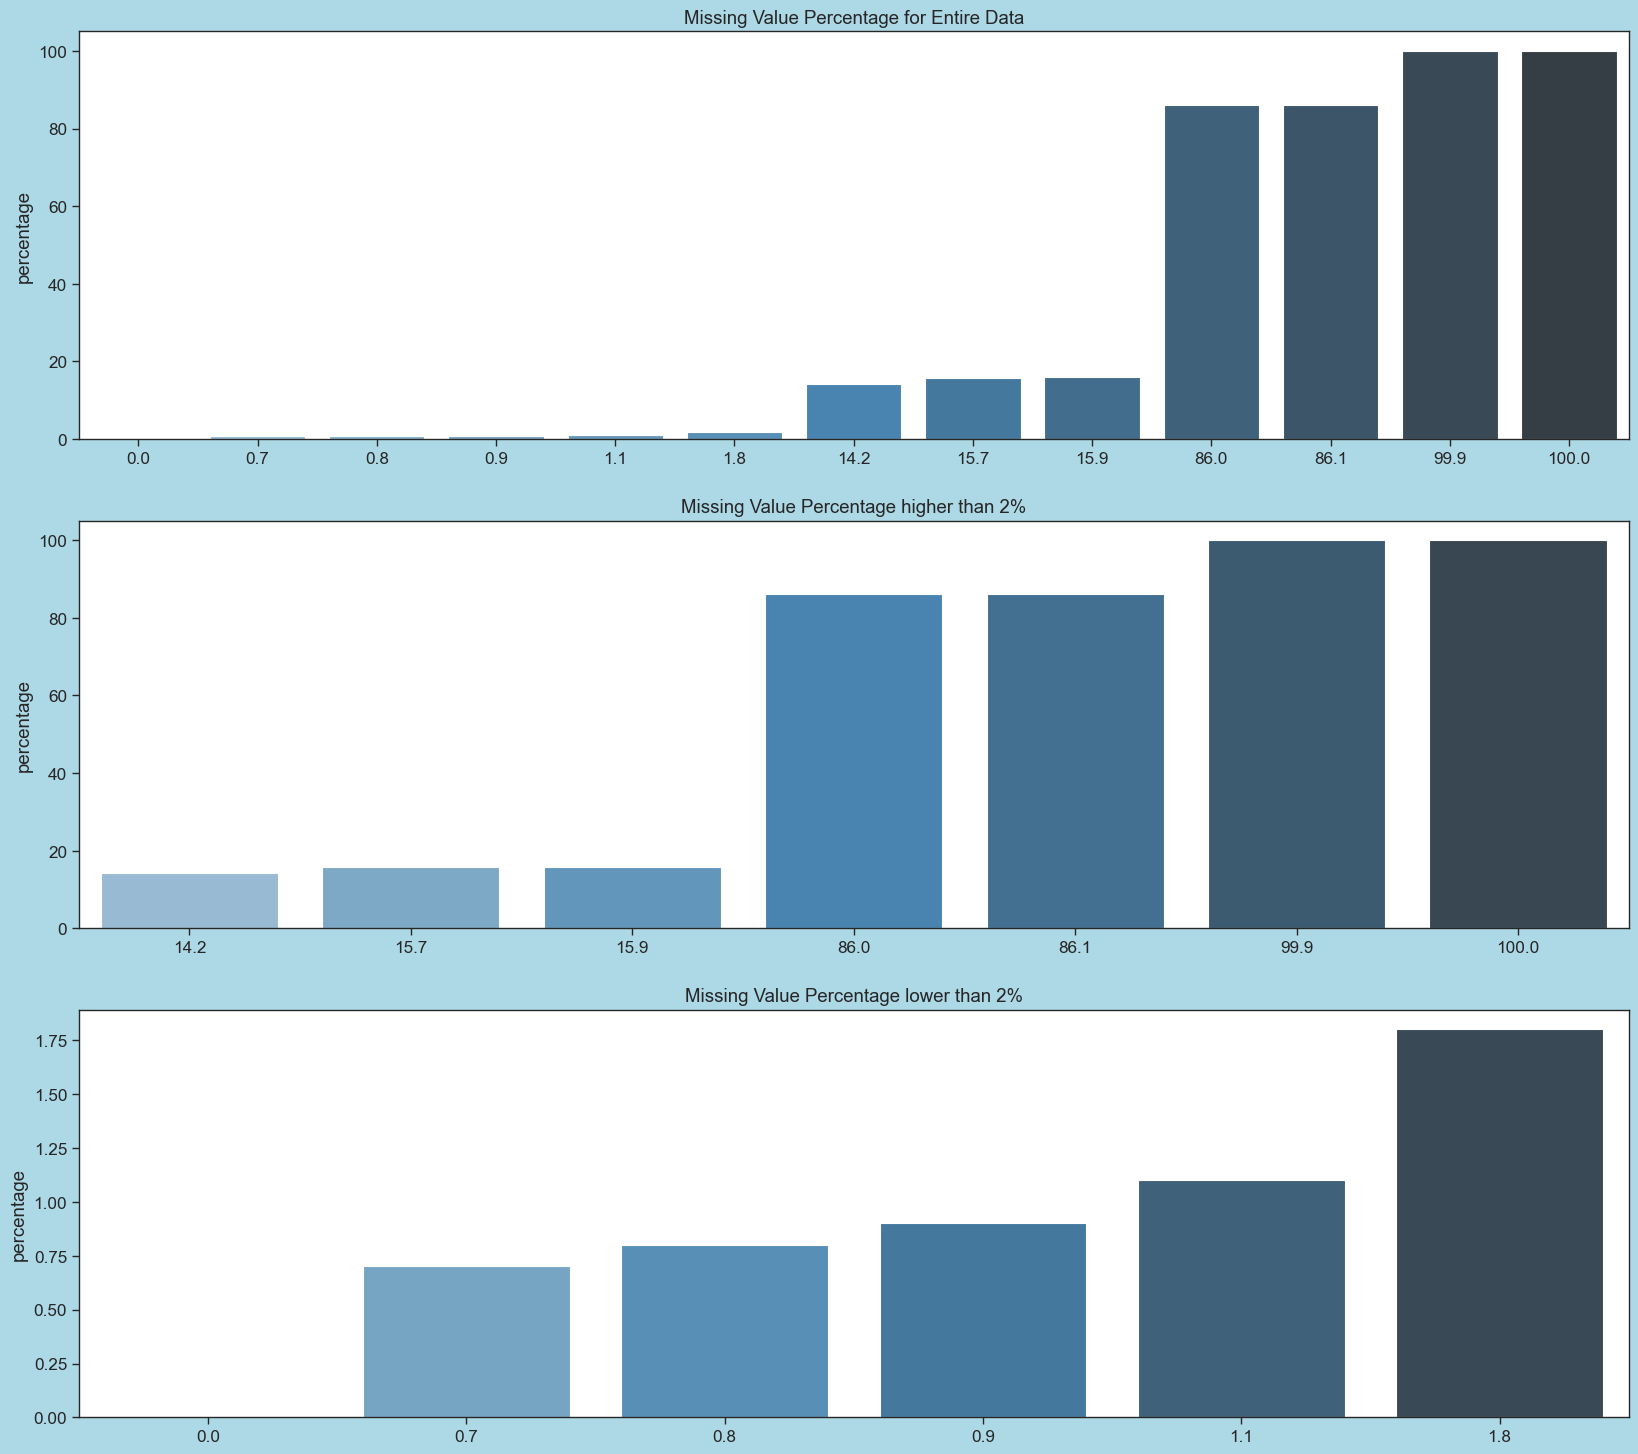

In [179]:
#Visualizing the nan values
fig,ax = plt.subplots(3,1,figsize=(20,18),facecolor='lightblue')
sns.set_style('ticks')
sns.set_context('paper',font_scale=1.4)
sns.barplot(
            x=nan_vals.index,
            y=nan_vals,
            data=nan_vals,
            palette='Blues_d',
            ax=ax[0])   

sns.barplot(
            x=nan_vals_high.index,
            y=nan_vals_high,
            data=nan_vals_high,
            palette='Blues_d',
            ax=ax[1])   

sns.barplot(
            x=nan_vals_low.index,
            y=nan_vals_low,
            data=nan_vals_low,
            palette='Blues_d',
            ax=ax[2])

ax[0].set(title='Missing Value Percentage for Entire Data',ylabel='percentage')
ax[1].set(title='Missing Value Percentage higher than 2%',ylabel='percentage')
ax[2].set(title='Missing Value Percentage lower than 2%',ylabel='percentage')
plt.show()

### 2.2 Missing value treatment


#### 2.2.1 Remove the records whose Closed Date values are null

In [180]:
service_req_df['Closed Date'].shape
#  Shape of the Series Before droping NaN Values

(364558,)

In [181]:
service_req_df.dropna(subset= 'Closed Date',inplace=True)

In [182]:
service_req_df['Closed Date'].shape
# The shape changes from 364558 to 362177 about 2381 data points are removed ie about less than 1%

(362177,)

### 2.3 Analyze the date column, and remove entries that have an incorrect timeline


            * As the unique values in months ,weeks and days are correct then we can conclude that there are no incorrect  timelines entered 


In [183]:
service_req_df['Created Date'].dt.month.nunique()
#  Threre are 12 unique months that means there are no missing or additional entries

12

In [184]:
service_req_df['Created Date'].dt.weekday.nunique()
# there are 7 unique weekdays that means there are no incorrect entries

7

In [185]:
service_req_df['Created Date'].dt.day.nunique()
#  there are 31 unique days 

31

####  2.3.1 Calculate the time elapsed in closed and creation date


In [186]:
service_req_df['Request_Closing_Time']=(
                                        service_req_df['Closed Date']
                                        -service_req_df['Created Date']
)

In [187]:
service_req_df['Request_Closing_Time'].head()

0   0 days 00:55:30
1   0 days 01:27:13
2   0 days 04:51:34
3   0 days 07:45:27
4   0 days 03:27:44
Name: Request_Closing_Time, dtype: timedelta64[ns]

#### 2.3.2 Convert the calculated date to seconds to get a better representation


In [188]:
service_req_df['Request_Closing_Time']=(    
    service_req_df['Request_Closing_Time']
    .apply(lambda x: x.total_seconds())
)

In [189]:
service_req_df['Request_Closing_Time'].head()
# Time difference in seconds 

0     3330.0
1     5233.0
2    17494.0
3    27927.0
4    12464.0
Name: Request_Closing_Time, dtype: float64

#### 2.3.3 View the descriptive statistics for the newly created column


In [190]:
(
    service_req_df['Request_Closing_Time']
    .describe()
    .astype(str)
)
#  As the Values are in Seconds for easy reading the type is changed to str 

count              362177.0
mean     15113.299632500131
std       21102.54751956912
min                    61.0
25%                  4533.0
50%                  9616.0
75%                 18878.0
max               2134342.0
Name: Request_Closing_Time, dtype: object

#### 2.3.4 Check the number of null values in the Complaint_Type and City columns

In [191]:
(
    service_req_df[['Complaint Type','City']]
     .isna()
     .sum()
)

Complaint Type      0
City              674
dtype: int64

#### 2.3.5 Impute the NA value with Unknown City

In [192]:
(
    service_req_df['City']
    .fillna('Unknown City',inplace=True)
)

In [193]:
(
    service_req_df['City']
    .isna()
    .sum()
)

0

#### 2.3.6 Draw a frequency plot for the complaints in each city

In [194]:
complaint_city =( 
                service_req_df
                .groupby('City')['Complaint Type']
                .size()
)              

In [195]:
complaint_city.head()

City
ARVERNE       259
ASTORIA      7991
Astoria       905
BAYSIDE      1550
BELLEROSE     487
Name: Complaint Type, dtype: int64

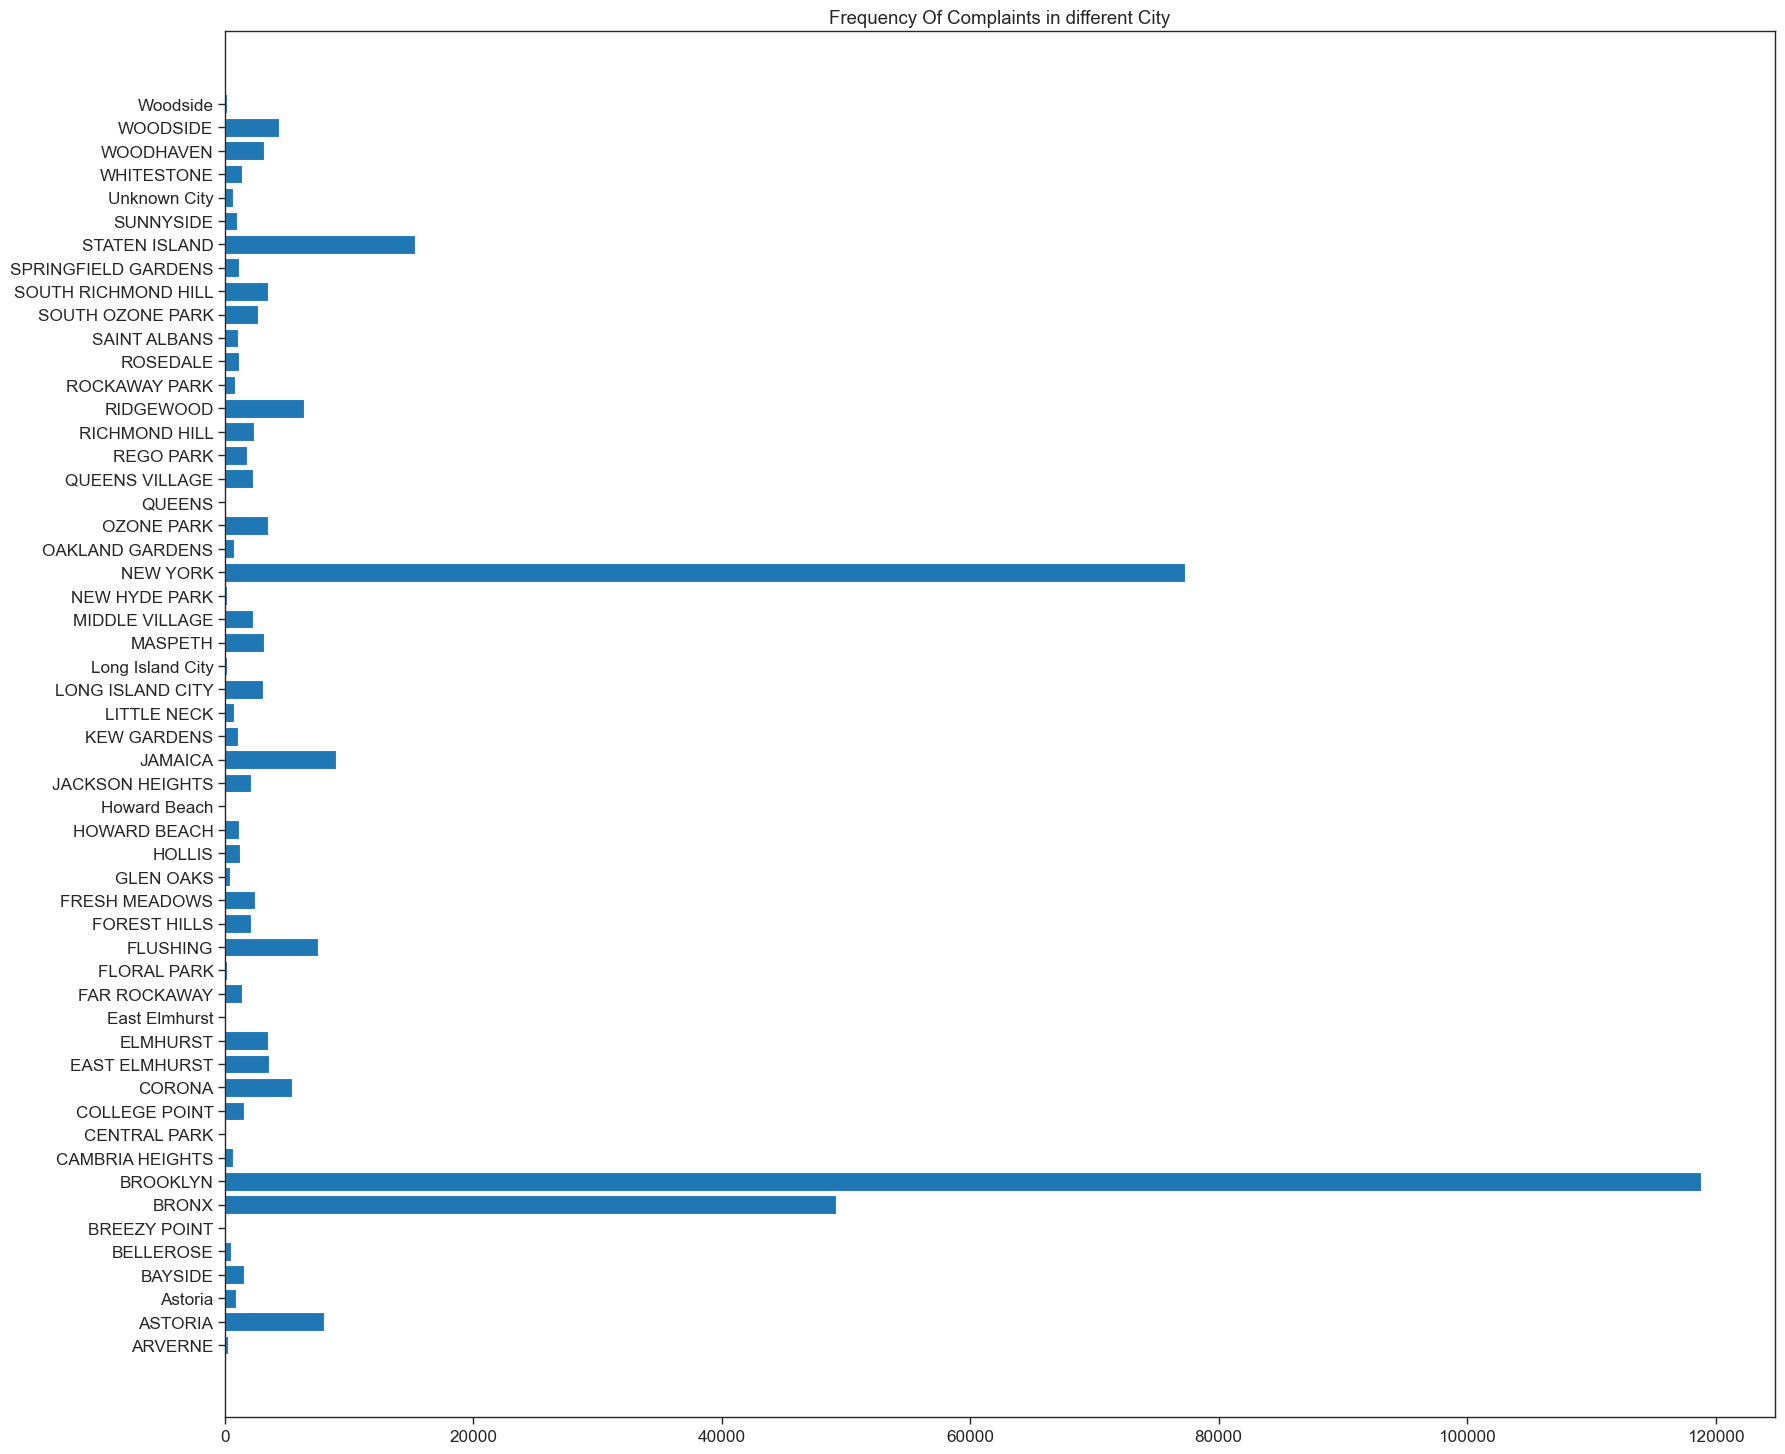

In [196]:
fig,ax = plt.subplots(figsize=(20,18))
ax.barh(complaint_city.index,complaint_city.values)
ax.set_title('Frequency Of Complaints in different City');

#### 2.3.7 Create a scatter and hexbin plot of the concentration of complaints across Brooklyn

In [197]:
complaint_brooklyn =( 
                service_req_df
                .groupby(['Complaint Type','City'])
                .size()
                .reset_index()
)

In [198]:
complaint_brooklyn=complaint_brooklyn[complaint_brooklyn['City']=='BROOKLYN']
complaint_brooklyn

,Complaint Type,City,0
7,Animal Abuse,BROOKLYN,3191
53,Bike/Roller/Skate Chronic,BROOKLYN,124
84,Blocked Driveway,BROOKLYN,36445
136,Derelict Vehicle,BROOKLYN,6257
186,Disorderly Youth,BROOKLYN,79
219,Drinking,BROOKLYN,291
261,Graffiti,BROOKLYN,60
288,Homeless Encampment,BROOKLYN,948
328,Illegal Fireworks,BROOKLYN,61
355,Illegal Parking,BROOKLYN,33532


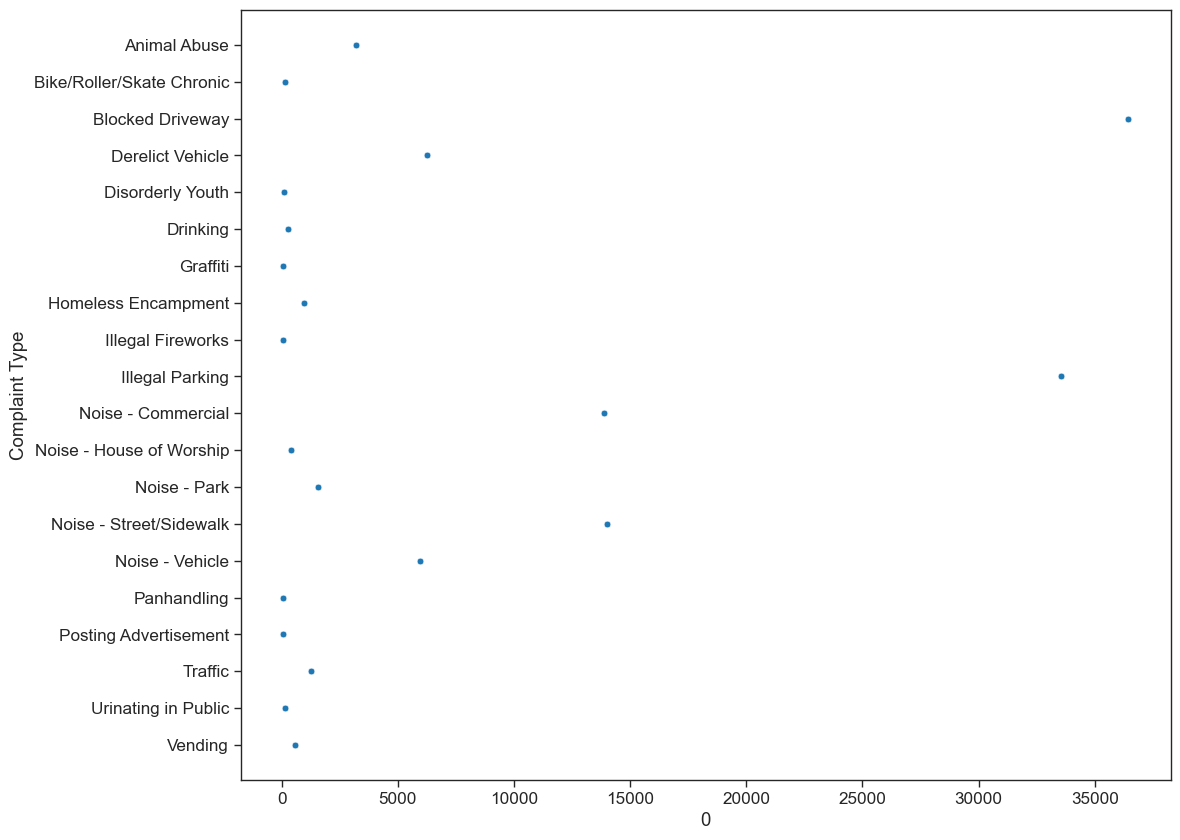

In [199]:
plt.figure(figsize=(12,10))
fig = sns.scatterplot(complaint_brooklyn ,x=complaint_brooklyn.iloc[:,-1],y=complaint_brooklyn['Complaint Type'],palette ='Blues_d')
fig.set_title = ('Concentration Of Complaints Across BROOKLYN')
fig.set_ylabel = ('Concentration Of Complaints Across BROOKLYN');

In [200]:
comp_brooklyn_loc=service_req_df[service_req_df['City']== 'BROOKLYN']
comp_brooklyn_loc[['City','Complaint Type','Latitude','Longitude']]

,City,Complaint Type,Latitude,Longitude
5,BROOKLYN,Illegal Parking,40.660823,-73.992568
9,BROOKLYN,Blocked Driveway,40.623793,-73.999539
13,BROOKLYN,Illegal Parking,40.687511,-73.874505
17,BROOKLYN,Noise - Commercial,40.679154,-73.983430
18,BROOKLYN,Noise - Commercial,40.616550,-73.930202
...,...,...,...,...
364539,BROOKLYN,Blocked Driveway,40.691248,-73.984375
364541,BROOKLYN,Blocked Driveway,40.713613,-73.956966
364544,BROOKLYN,Noise - Commercial,40.680352,-73.974766
364545,BROOKLYN,Blocked Driveway,40.692384,-73.904011


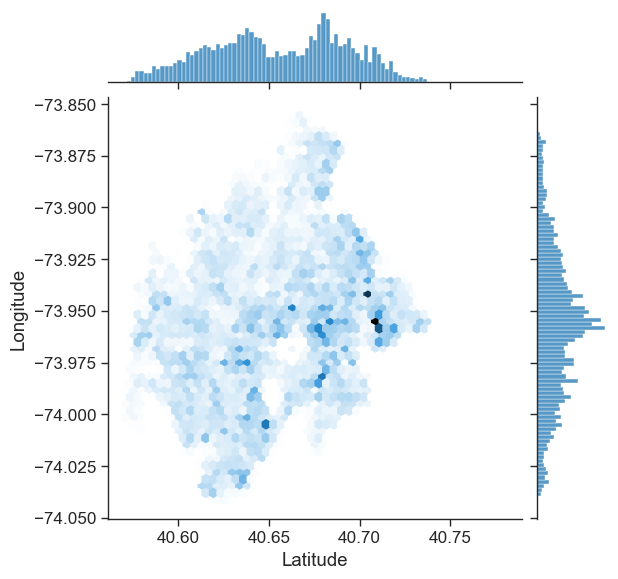

In [201]:
fig = sns.jointplot(x='Latitude',y='Longitude',data=comp_brooklyn_loc,kind='hex',palette='Blues_d');

# 3. Find major types of complaints:


In [202]:
complaint_types = (
    service_req_df
    .groupby('Complaint Type')
    .size()
)

In [203]:
complaint_types.head()

Complaint Type
Agency Issues                     8
Animal Abuse                  10530
Animal in a Park                  1
Bike/Roller/Skate Chronic       475
Blocked Driveway             100624
dtype: int64

## 3.1 Plot a bar graph to show the types of complaints
As the frequency of plots are having high range of values we are taking the logarithm of the frequencies to get a better visual 

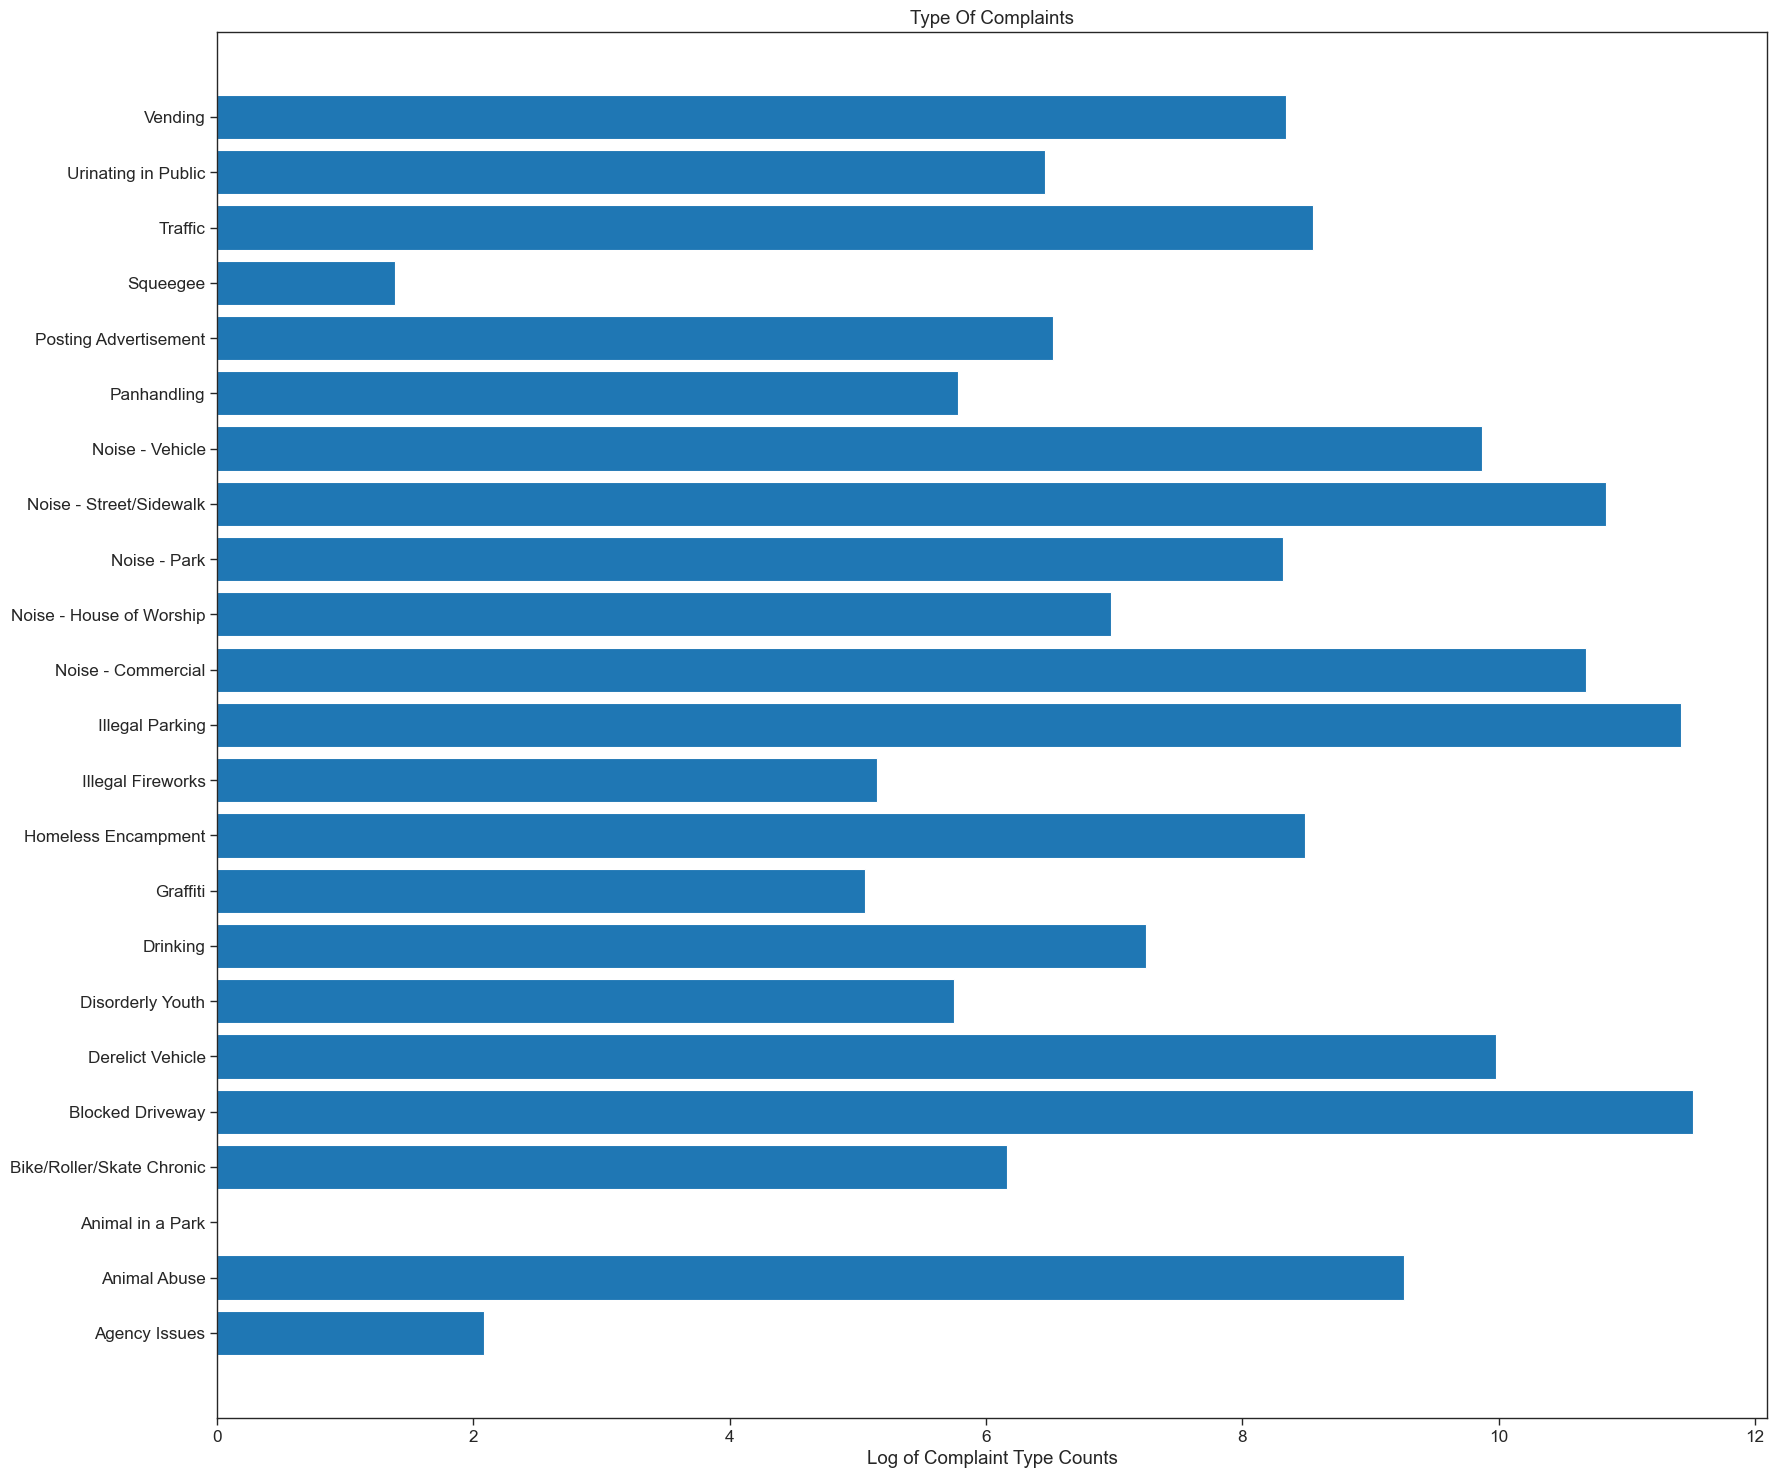

In [204]:
fig,ax = plt.subplots(figsize=(20,18))
ax.barh(complaint_types.index,np.log(complaint_types.values))
ax.set_xlabel('Log of Complaint Type Counts')
ax.set_title('Type Of Complaints');
# Here the frequency are in log values to see the variation in a chart 

## 3.2 Check the frequency of various types of complaints for New York City
As the frequency of plots are having high range of values we are taking the logarithm of the frequencies to get a better visual 

In [205]:
newyork_complaints= (
    service_req_df
    .groupby(['City','Complaint Type'])
    .size()
    .reset_index()
)

In [206]:
newyork_complaints=newyork_complaints[newyork_complaints['City']=='NEW YORK']

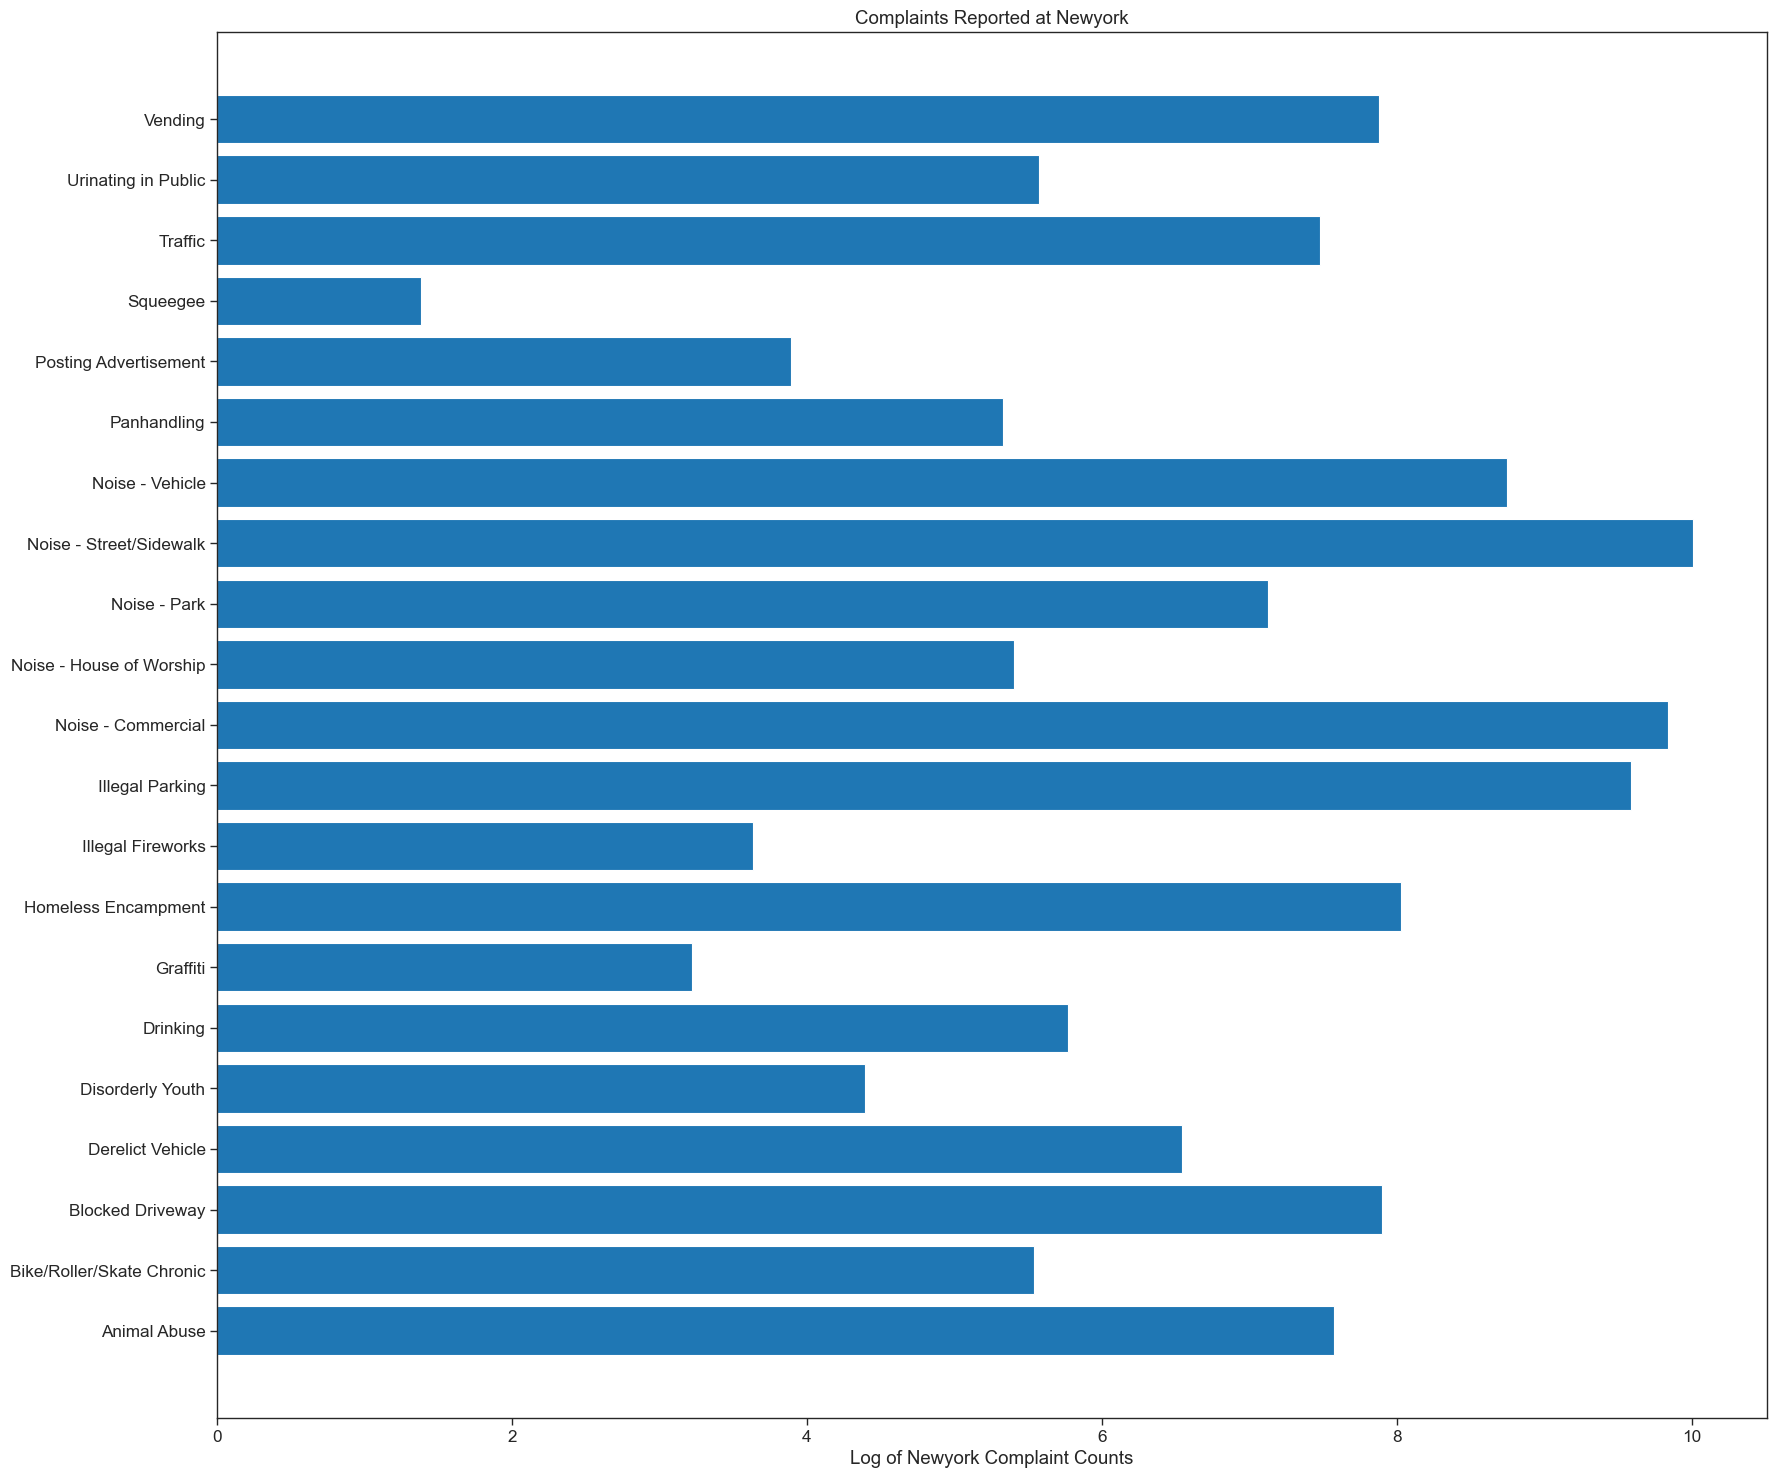

In [207]:
fig,ax = plt.subplots(figsize=(20,18))
ax.barh(newyork_complaints['Complaint Type'],np.log(newyork_complaints.iloc[:,-1]))
ax.set_xlabel('Log of Newyork Complaint Counts')
ax.set_title('Complaints Reported at Newyork');

## 3.3 Find the top 10 complaint types

In [208]:
service_req_df.groupby(['Complaint Type']).size().sort_values(ascending=False)[:10]

Complaint Type
Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
dtype: int64

## 3.4 Display the various types of complaints in each city

In [209]:
city_complaint =(
    service_req_df
    .groupby(['City','Complaint Type'])
    .size()
    .reset_index()
)

In [210]:
city_complaint.rename(columns={city_complaint.columns[-1]:'Count'},inplace=True)

In [211]:
city_complaint

,City,Complaint Type,Count
0,ARVERNE,Animal Abuse,46
1,ARVERNE,Blocked Driveway,50
2,ARVERNE,Derelict Vehicle,32
3,ARVERNE,Disorderly Youth,2
4,ARVERNE,Drinking,1
...,...,...,...
787,Woodside,Blocked Driveway,27
788,Woodside,Derelict Vehicle,8
789,Woodside,Illegal Parking,124
790,Woodside,Noise - Commercial,2


## 3.5 Create a DataFrame, df_new, which contains cities as columns and complaint types in rows

In [212]:
df_new= city_complaint.pivot( columns='City', values='Complaint Type')

In [213]:
df_new.head()

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
0,Animal Abuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Blocked Driveway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Derelict Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Disorderly Youth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Drinking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4. Visualize the major types of complaints in each city

In [214]:
city_complaint.head()

,City,Complaint Type,Count
0,ARVERNE,Animal Abuse,46
1,ARVERNE,Blocked Driveway,50
2,ARVERNE,Derelict Vehicle,32
3,ARVERNE,Disorderly Youth,2
4,ARVERNE,Drinking,1


## 4.1 Draw another chart that shows the types of complaints in each city in a single chart, where different colors show the different types of complaints

In [215]:
crosstab = pd.crosstab(index=service_req_df['City'],columns=service_req_df['Complaint Type'])

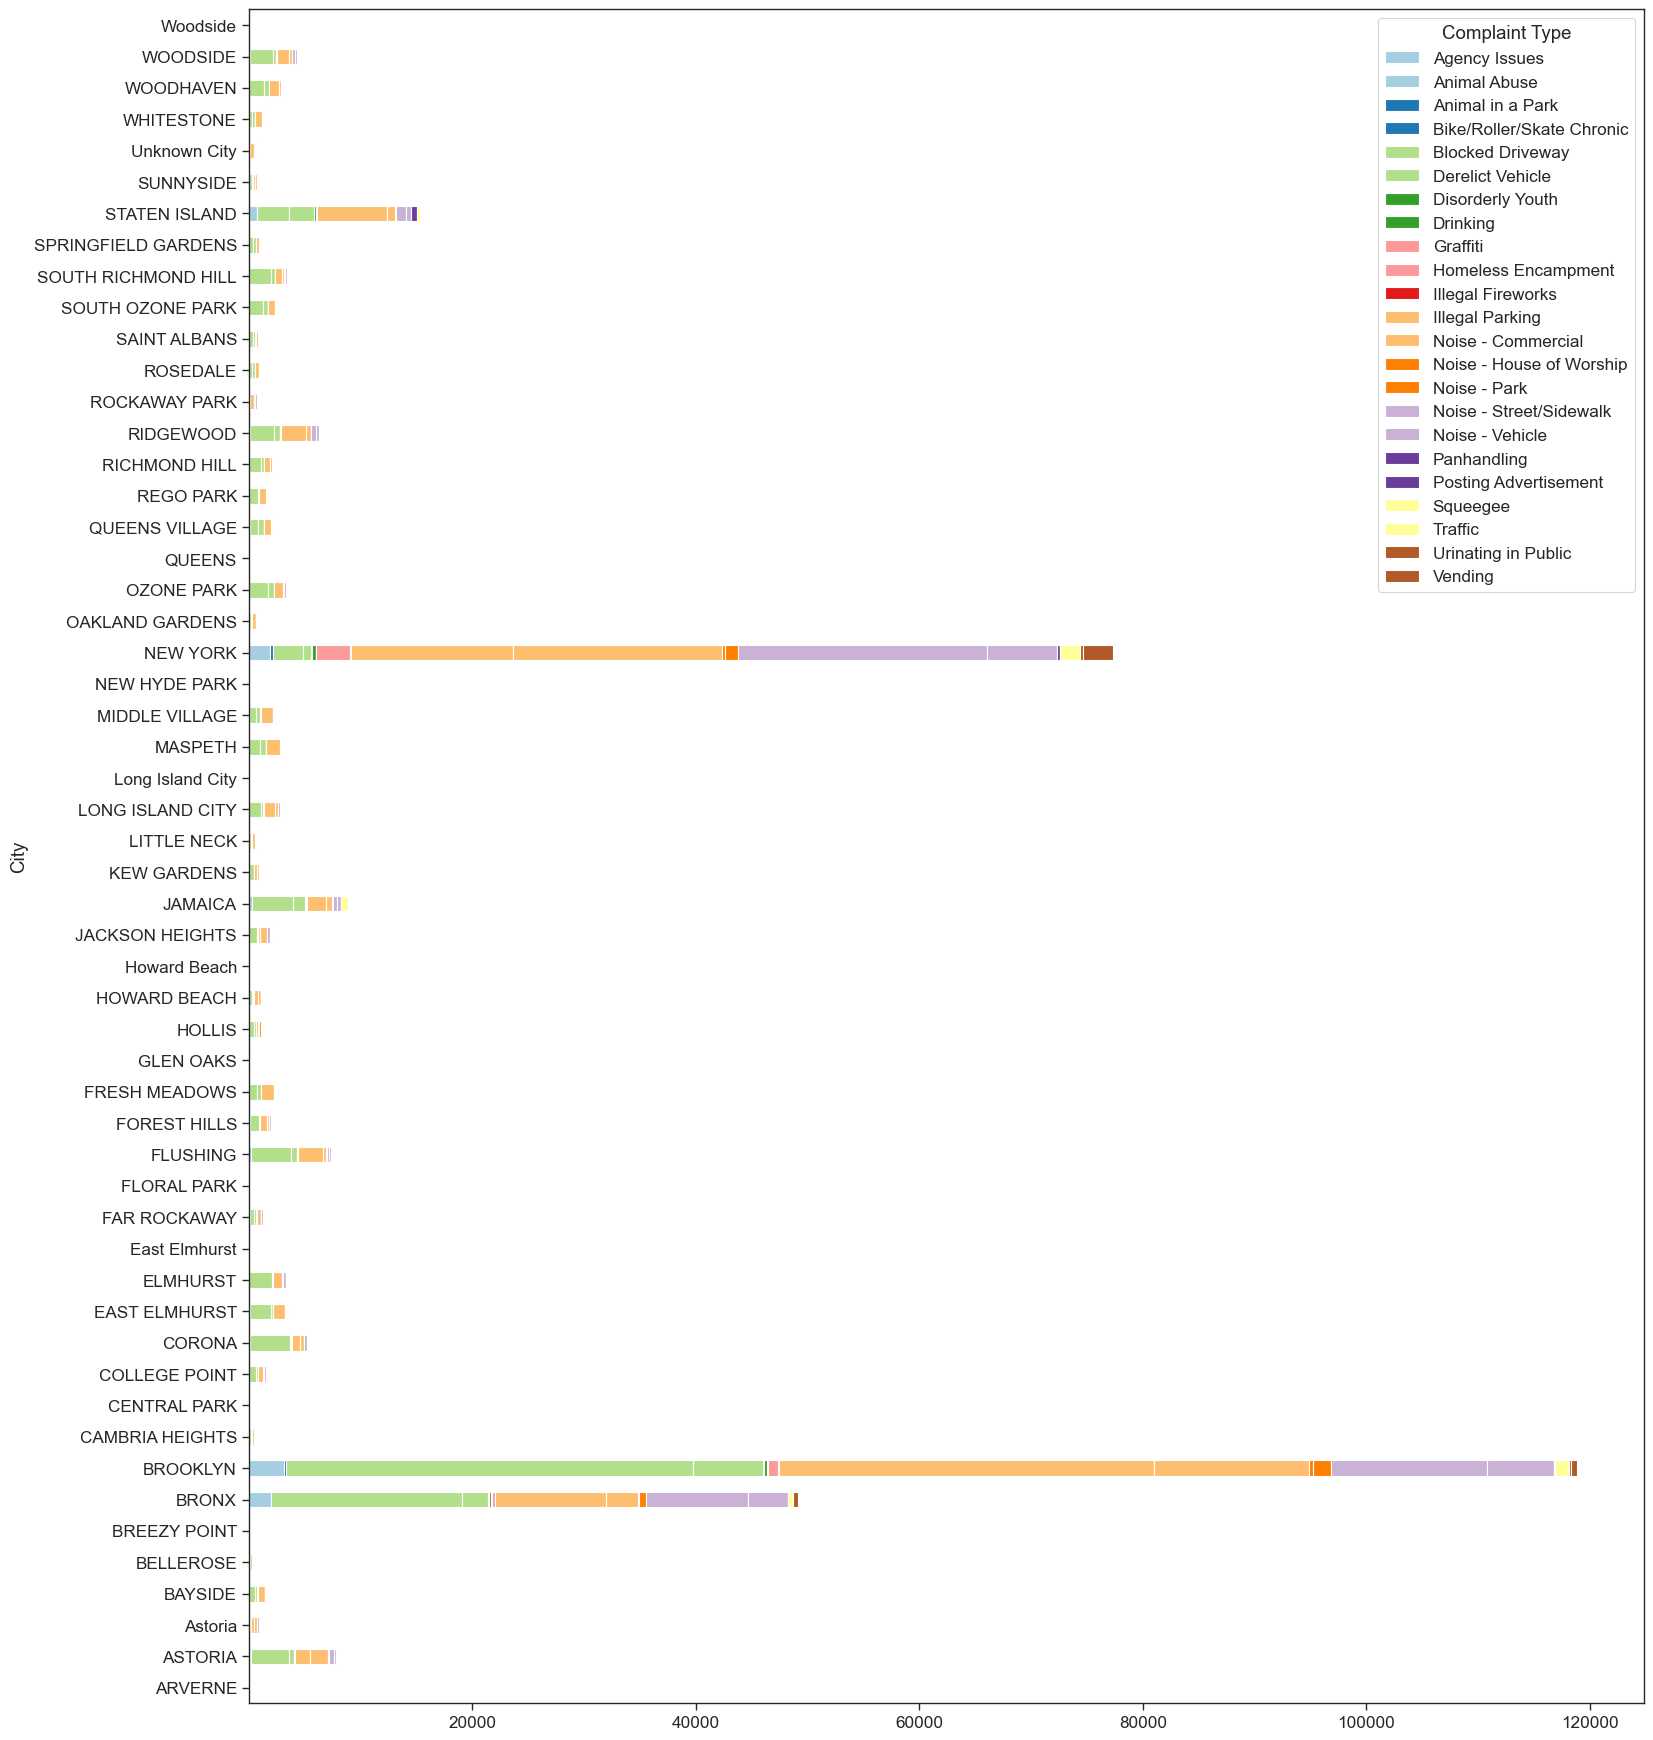

In [216]:
crosstab.plot(kind="barh", figsize=(18,22), stacked=True, colormap='Paired',);

## 4.2 Sort the complaint types based on the average Request_Closing_Time grouping them for different locations

In [246]:
(
    service_req_df
    .groupby('Location Type')['Request_Closing_Time']
    .mean()
    .round(2)
    .sort_values()
    .astype('str')
)

Location Type
Subway Station                   8707.2
Club/Bar/Restaurant            11009.53
House of Worship               11403.17
Store/Commercial               11575.73
Highway                        12262.34
Park/Playground                12395.68
Bridge                          13767.5
Street/Sidewalk                15663.18
Residential Building           16035.62
Commercial                     16238.99
Roadway Tunnel                 17009.16
House and Store                17505.01
Parking Lot                     17791.6
Residential Building/House     18013.99
Vacant Lot                     24273.72
Park                          1212634.0
Name: Request_Closing_Time, dtype: object

# 5. See whether the average response time across different complaint types is similar (overall)

In [218]:
complaint_response_time = service_req_df.groupby('Complaint Type')['Request_Closing_Time'].mean()

In [219]:
complaint_response_time.dropna(inplace=True)

In [248]:
(
    complaint_response_time
    .sort_values(ascending=False)
    .round(2)
    .astype(str)
)

Complaint Type
Animal in a Park             1212634.0
Derelict Vehicle               25359.6
Graffiti                      23276.34
Agency Issues                 18289.12
Animal Abuse                  18032.56
Blocked Driveway              16232.52
Panhandling                   15853.55
Illegal Parking               15650.44
Homeless Encampment           15451.38
Squeegee                      14560.25
Vending                       14366.28
Drinking                       13821.3
Bike/Roller/Skate Chronic     13123.69
Urinating in Public           12959.29
Noise - Vehicle                12561.8
Disorderly Youth              12363.75
Traffic                       12309.12
Noise - Street/Sidewalk        12231.3
Noise - Park                  12226.06
Noise - House of Worship      11391.09
Noise - Commercial            11085.76
Illegal Fireworks             10113.48
Posting Advertisement          7286.26
Name: Request_Closing_Time, dtype: object

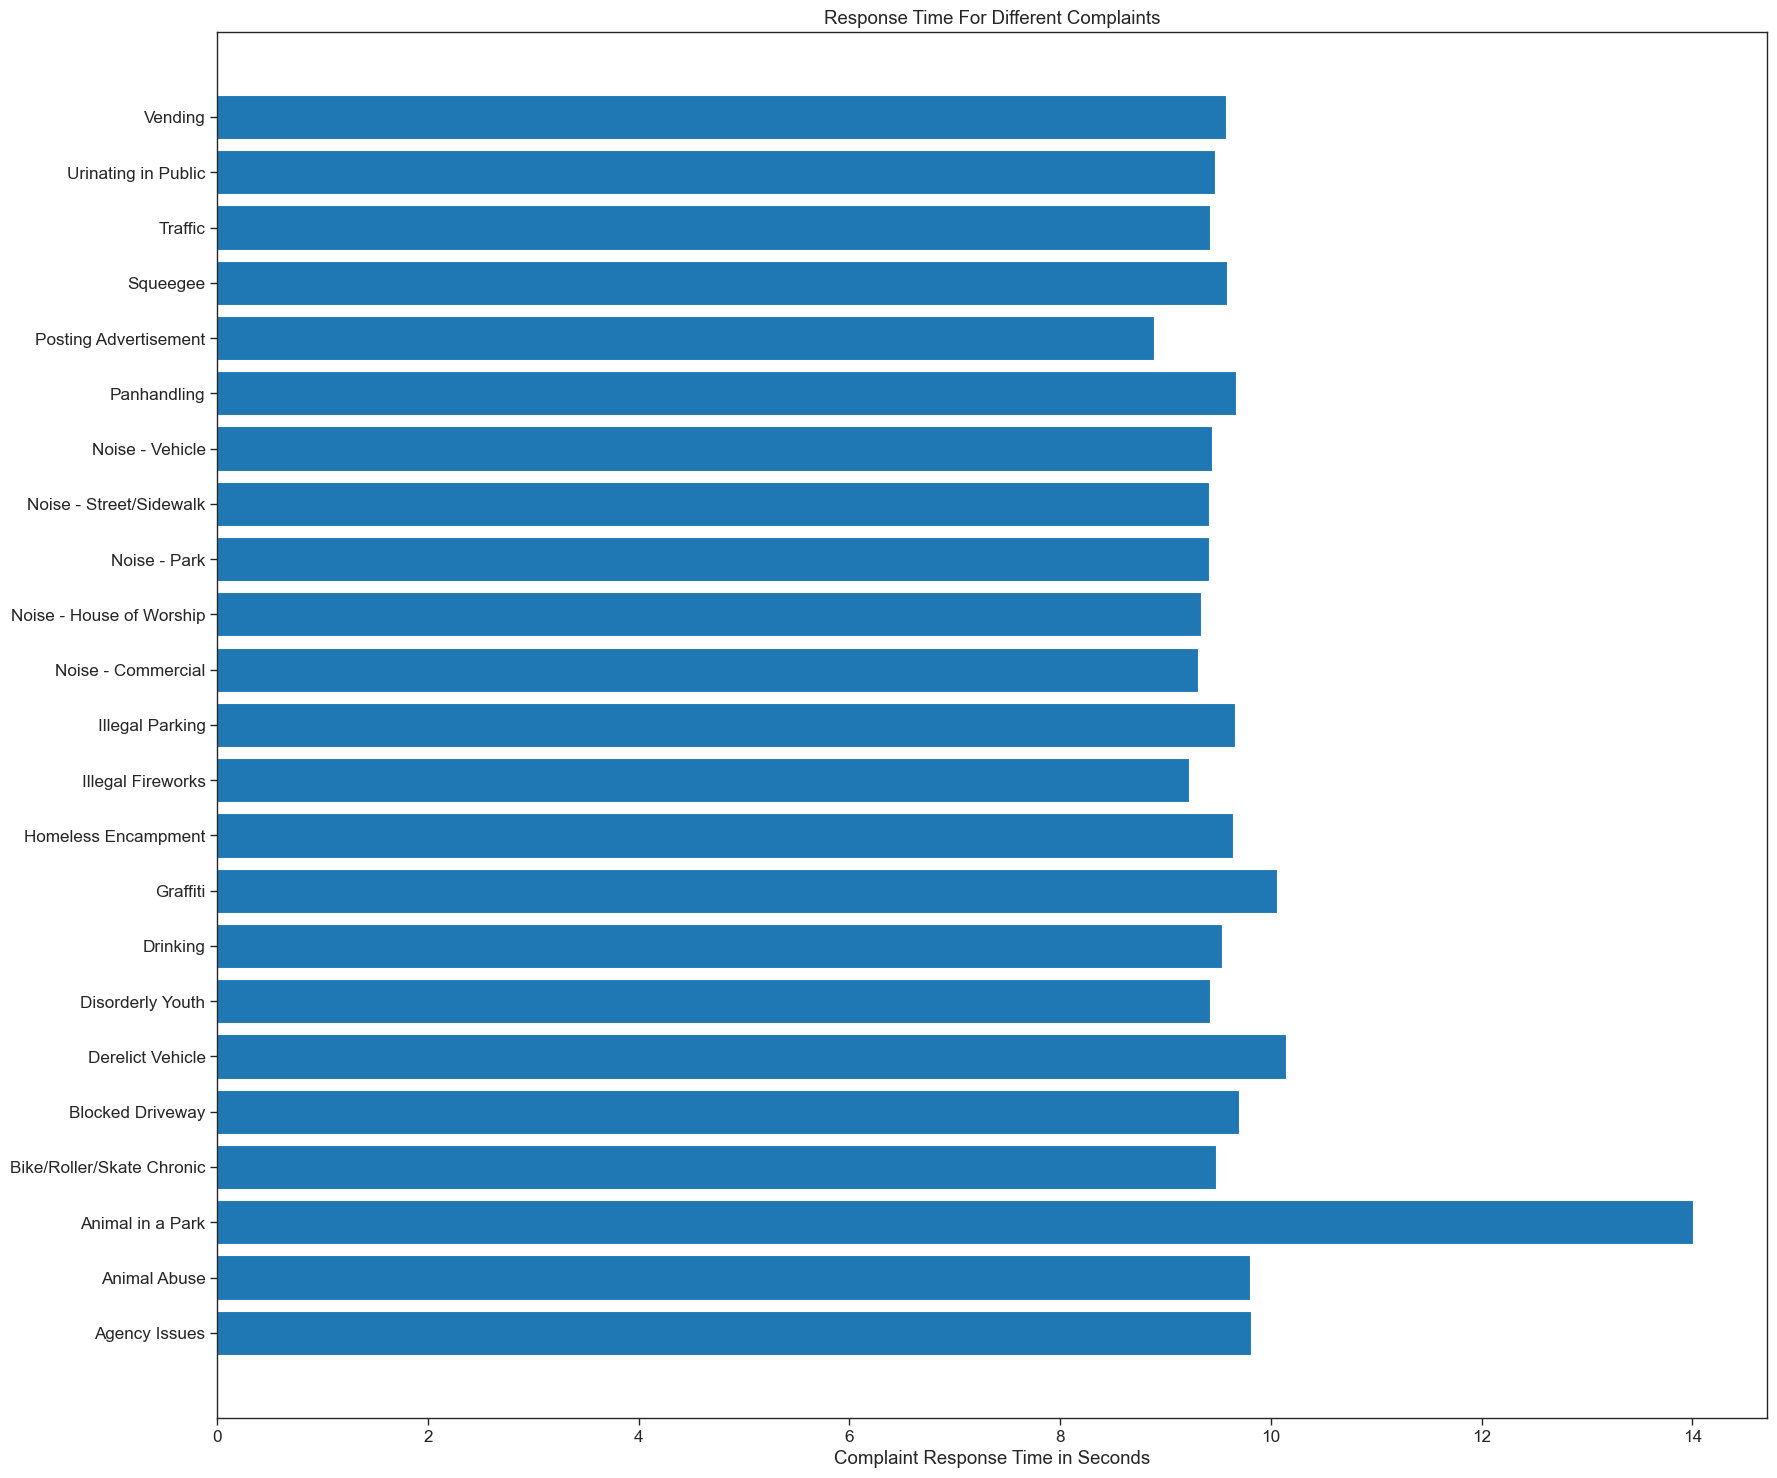

In [221]:
fig,ax = plt.subplots(figsize=(20,18))
ax.barh(complaint_response_time.index,np.log(complaint_response_time.values))
ax.set_title('Response Time For Different Complaints')
ax.set_xlabel('Complaint Response Time in Seconds');

##### Inference 
        * As in the Graph, the response time of Each complaint types have Comprable means 
        

# 6. Identify the significant variables by performing statistical analysis using p-values
        * Using P values and Hypothesis testing , we can find the Significant variables affecting the Outcome variable 
        * Here the Outcome variable is the Resolution Time for Every complaints denoted by the column 'Request_Closing_Time' and the other variable to cosider are 
        1) The Complaint Type 
        2) The Location (mainly City , )
        3)  The day of the week 
        
As The outcomr variable is a Continous Variable and the others are catagorical variables with more than two catagories , we have to perform ANOVA to find out the Significance level 

** For all Testing the significance level is taken as alpha = .05 

#### The Complaint Types 

Q:Weather Complaint Type affect the Resolution Time ?

         *H0 : Complaint Type does not affect the Time taken for Closing the Complaint (ie Mean time across each Complaint type are same )
         
         *Ha : Complaint type Affects the Time Taken to close Each Complaints 

In [222]:
service_req_df.Request_Closing_Time.isna().sum()

0

In [223]:
complaint_type_list=[] # we are taking Unique values in Complaint Types 
for name,df in service_req_df.groupby('Complaint Type'):
    complaint_type_list.append(df['Request_Closing_Time'])# iterating over groupby Object and selecting the appropiate closing time for each complaint type

In [224]:
complaint_type_list[0]

186023    27090.0
187856    37381.0
207251     9736.0
239986    24686.0
246205     4073.0
279079    10628.0
302893    30818.0
322349     1901.0
Name: Request_Closing_Time, dtype: float64

In [225]:
stats_comp_type,pvalue_comp_type = stats.f_oneway(*complaint_type_list)

#### City
Q:Weather City affect the Resolution Time ?

     *H0 : City  does not affect the Time taken for Closing the Complaint (ie Mean time across each City type are same )
     
     *Ha : City  Affects the Time Taken to close Each Complaints 

In [226]:
city_list=[]# we are taking Unique values in City 
for name,df in service_req_df.groupby('City'):
    city_list.append(df['Request_Closing_Time'])

In [227]:
city_list[0]

3927      11270.0
5256       5437.0
7932       5752.0
8260       5813.0
8685      17513.0
           ...   
359186     6578.0
359600    16279.0
361481    25624.0
362250     6521.0
364123    15814.0
Name: Request_Closing_Time, Length: 259, dtype: float64

In [228]:
stats_city,pvalue_city = stats.f_oneway(*city_list)

#### Week Days
Q:Weather Week Days affect the Resolution Time ?

     *H0 : Week Days does not affect the Time taken for Closing the Complaint (ie Mean time across each Week Days are same )
     
     *Ha : Week Days Affects the Time Taken to close Each Complaints 

In [229]:
import datetime

In [230]:
service_req_df['Created_Date_Day'] = service_req_df['Created Date'].dt.strftime('%A')#Here we are checking the relationship with week days , weather week days affect settelment

In [231]:
created_day_list =[]
for name,df in service_req_df.groupby('Created_Date_Day'):
    created_day_list.append(df['Request_Closing_Time'])

In [232]:
stats_day ,pvalue_day = stats.f_oneway(*created_day_list)

In [233]:
print(stats_comp_type,  'pvalue:',pvalue_comp_type)
print(stats_city, 'pvalue:', pvalue_city)
print(stats_day , 'pvalue:', pvalue_day)

565.2615700417628 pvalue: 0.0
340.34205137752286 pvalue: 0.0
153.73718994979868 pvalue: 9.537990871505454e-196


### Inference 
As all the pvalues are less than .05 the significant level : we are rejecting the Null hypothesis 
ie  a small p-value indicates that there is a significant difference between at least one pair of group means.

# 7. Perform a Kruskal-Wallis H test

### The Kruskal-Wallis H test is a non-parametric statistical test used to compare the medians of three or more independent groups.
The Kruskal-Wallis H test does not assume that the data follow a normal distribution and is suitable for non-normal or ordinal data.

         *H0 : Complaint Type and Time taken for Closing the Complaint  have same medians
         
         *Ha : Complaint type and Time Taken to close Each Complaints have significant different medians 

In [234]:
df=service_req_df[['Request_Closing_Time','City','Complaint Type' ]]

In [235]:
df['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Agency Issues', 'Squeegee', 'Animal in a Park'], dtype=object)

In [236]:
df['comp_type_Rank'] = df['Complaint Type'].astype('category').cat.codes + 1# Create Ranks for each Complaint type 

In [237]:
df['city_rank']=df['City'].astype('category').cat.codes + 1# creating Ranks for the City 

In [238]:
df.head()

,Request_Closing_Time,City,Complaint Type,comp_type_Rank,city_rank
0,3330.0,NEW YORK,Noise - Street/Sidewalk,16,34
1,5233.0,ASTORIA,Blocked Driveway,5,2
2,17494.0,BRONX,Blocked Driveway,5,7
3,27927.0,BRONX,Illegal Parking,12,7
4,12464.0,ELMHURST,Illegal Parking,12,14


In [239]:
comp_list = [group['comp_type_Rank'] for group, group in df.groupby('Complaint Type')]
comp_list[0:3]

[186023    1
 187856    1
 207251    1
 239986    1
 246205    1
 279079    1
 302893    1
 322349    1
 Name: comp_type_Rank, dtype: int8,
 89        2
 140       2
 164       2
 189       2
 247       2
          ..
 364297    2
 364322    2
 364340    2
 364406    2
 364445    2
 Name: comp_type_Rank, Length: 10530, dtype: int8,
 283132    3
 Name: comp_type_Rank, dtype: int8]

In [240]:
stats_comp_type,pvalue_comp_type = stats.kruskal(*comp_list)

In [241]:
city_list = [group['city_rank'] for group, group in df.groupby('City')]
city_list[0:3]

[3927      1
 5256      1
 7932      1
 8260      1
 8685      1
          ..
 359186    1
 359600    1
 361481    1
 362250    1
 364123    1
 Name: city_rank, Length: 259, dtype: int8,
 1         2
 66        2
 107       2
 143       2
 159       2
          ..
 363822    2
 364139    2
 364185    2
 364355    2
 364538    2
 Name: city_rank, Length: 7991, dtype: int8,
 74987     3
 74988     3
 75055     3
 75404     3
 76383     3
          ..
 363152    3
 363502    3
 363860    3
 364197    3
 364496    3
 Name: city_rank, Length: 905, dtype: int8]

In [242]:
stats_city,pvalue_city = stats.kruskal(*city_list)

In [243]:
print(stats_comp_type,pvalue_comp_type)
print(stats_city,pvalue_city)

362175.9999999999 0.0
362176.0000000005 0.0


### Inference
As the pvalues are less than the Significant value of .05 we can reject the null Hypothesis , and conclude that the medians of the variables tested have significant difference 

# 8. Present your observations

### key findings from the data. ​

#### 
    *The data represent One year Complaints spaning from jan 2015 to dec 2015 
    *The maximum time taken to resolve these issues is like 24 days (one single complaint )
    *The average maximum resolution time come down to 14 days(Animal In park )
    *Brooklyn and Newyork Are the two Cities that reported the maximum number of complaints 
    *Brooklyn it is mainly Bloked Highway and Illegal Parking
    *New york it is noice issues and illegalparking 
    

    

### Statical Analysis and Hypothesis Testing

####
    *As the average resolution time for each complaints are some what similar visually  , but still there are various factors affecting the small time difference 
    * As we have more than two catagories for our catagorical variable , wehave to use ANNOVA for finding the Significant Variables 
ANNOVA

    * we Conducted ANNOVA for checking if there is means across each complaint types taking the resolution time is same ? but pvalues are lower than alpha values , gives the assumptions that the means are different and the type of complaints affect the Closing time for complaints
    *Same is the case with City , Complaint Closing time for different Cities are different 
    *The week day also affect the complaint closing time 
 
 Kruskal-Wallis H test
 
     *Kruskal-Wallis H test is done to to compare the medians of three or more independent groups
     * The test is done on Complaint Types and complaint Closing Time and find out that there is a significant difference in the median valuen of different Complaints 
     * then test is done on City and found out that here is a significant difference in the median valuen of different Cities

    
